### CCAA Python Training Part 2
<p> Date Created: September 8th 2021 </p>
<p> Created By: Analyst 134 </p> 
<p> Data Sources and Examples Located in NFCAPythonTraining.ipynb </p>

In [2]:
# import libraries 
import pandas as pd
import numpy as np 
import os 
import geopandas as gpd
import calmap
import calplot
import matplotlib.pyplot as plt

In [24]:
# Pull data frame from the pervious notebook into this notebook to start building frequency tables for the Chief
%store -r Denver_Crimes_2020
pd.set_option('display.max_rows', 82429)
Denver_Crimes_2020.head()

,year,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,...,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,New_Date,Months,monthName,Datetime
0,2020,2.020132e+09,2.020000e+15,5707,0,criminal-trespassing,all-other-crimes,2/29/2020 20:15,NaN,2/29/2020 21:16,...,39.754698,6.0,611.0,five-points,1,0,2020-02-29,2,February,2020-02-29
1,2020,2.020121e+09,2.020000e+15,5441,0,traffic-accident,traffic-accident,2/25/2020 11:00,NaN,2/25/2020 11:02,...,39.730449,6.0,623.0,capitol-hill,0,1,2020-02-25,2,February,2020-02-25
2,2020,2.020298e+08,2.020000e+14,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/13/2020 23:00,1/14/2020 5:00,1/14/2020 11:07,...,39.679879,4.0,422.0,college-view-south-platte,1,0,2020-01-14,1,January,2020-01-14
3,2020,2.020431e+08,2.020000e+14,5212,1,weapon-by-prev-offender-powpo,all-other-crimes,1/20/2020 2:02,NaN,1/20/2020 3:36,...,39.752955,6.0,611.0,five-points,1,0,2020-01-20,1,January,2020-01-20
4,2020,2.020466e+08,2.020000e+14,2303,0,theft-shoplift,larceny,1/21/2020 15:43,NaN,1/21/2020 17:13,...,39.784132,5.0,511.0,stapleton,1,0,2020-01-21,1,January,2020-01-21


## Step 3: Create Frequency Tables 2020 Denver Data  Frequency Tables 
<p> <a href="http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html"> How to Create Frequency Tables </a></p> 
<p> Frequency Tables in Python are useful for looking at one variable. If you need to compare two columns, look at pivot tables. Note: piviot tables cant compare columns that have duplicates</p> 
</p>
<p><a href="https://towardsdatascience.com/a-step-by-step-guide-to-pandas-pivot-tables-e0641d0c6c70"> How to Create Pivot Tables </a></p>

### Crime Types

In [25]:
# Total Number of Offenses 
DCrimes = pd.crosstab(Denver_Crimes_2020.OFFENSE_CATEGORY_ID, columns ='count')
# percentages 
DCrimes['percent'] = (DCrimes['count'] / DCrimes['count'].sum()) * 100
# format percentages so a % symbol shows up 
DCrimes['percent'] = DCrimes['percent'].map('{:,.2f}%'.format)
# Call your frequency table by your dataframke variable
DCrimes.sort_values(by='count',ascending=False)

col_0,count,percent
OFFENSE_CATEGORY_ID,,
traffic-accident,14603,17.72%
all-other-crimes,12012,14.57%
theft-from-motor-vehicle,10179,12.35%
larceny,9851,11.95%
public-disorder,9762,11.84%
auto-theft,8273,10.04%
burglary,5141,6.24%
other-crimes-against-persons,3911,4.74%
aggravated-assault,2892,3.51%


### Neighborhoods Crime Rate

In [26]:
# Next Frequency Table Consists of Neighborhoods 
Neighborhoods =  pd.crosstab(Denver_Crimes_2020.NEIGHBORHOOD_ID, columns ='count')
# Get percentages 
Neighborhoods['percent'] = (Neighborhoods['count']/Neighborhoods['count'].sum()) * 100
# Format Percentages 
Neighborhoods['percent'] = Neighborhoods['percent'].map('{:,.2f}%'.format)
# Call dataframe 
Neighborhoods.sort_values(by='count',ascending=False)

col_0,count,percent
NEIGHBORHOOD_ID,,
five-points,4431,5.38%
capitol-hill,3363,4.08%
montbello,2653,3.22%
cbd,2576,3.13%
gateway-green-valley-ranch,2283,2.77%
stapleton,2228,2.70%
union-station,2129,2.58%
lincoln-park,2044,2.48%
baker,2035,2.47%


In [6]:
# Show Top 5 Neighborhoods for Denver Based on number of Crimes Reported. 
Top5 = Denver_Crimes_2020.groupby(['NEIGHBORHOOD_ID']).NEIGHBORHOOD_ID.value_counts().nlargest(5)
Top5

NEIGHBORHOOD_ID             NEIGHBORHOOD_ID           
five-points                 five-points                   4431
capitol-hill                capitol-hill                  3363
montbello                   montbello                     2653
cbd                         cbd                           2576
gateway-green-valley-ranch  gateway-green-valley-ranch    2283
Name: NEIGHBORHOOD_ID, dtype: int64

### Frequency By Month

In [27]:
# Next Frequency Table Consists of Months 
Months =  pd.crosstab(Denver_Crimes_2020.monthName, columns ='count')
# Get percentages 
Months['percent'] = (Months['count']/Months['count'].sum()) * 100
# Format Percentages 
Months['percent'] = Months['percent'].map('{:,.2f}%'.format)
# Call dataframe 
Months.sort_values(by='count',ascending=False)

col_0,count,percent
monthName,,
August,7746,9.40%
January,7666,9.30%
October,7587,9.20%
September,7559,9.17%
July,7500,9.10%
November,6939,8.42%
February,6889,8.36%
May,6699,8.13%
June,6647,8.06%


## Step 4: Using Heat Map Calendar To Visualize Data
<p><a href ="https://pythonhosted.org/calmap/"> CalMap Library for Heatmap Calendars </a></p>
<p><a href ="https://www.youtube.com/watch?v=cKMEL9xgq2I&t=114s">Youtube Video Walkthrough of Calmap</a></p>

In [53]:
# Step 1: Convert New_Date to a datetime data type 
# Set index to date 
Denver_Crimes_2020['Datetime'] = pd.to_datetime(Denver_Crimes_2020['New_Date'])
Denver_Crimes_2020 = Denver_Crimes_2020.set_index('Datetime')
# Preview Data 
Denver_Crimes_2020.head()

,year,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,...,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,New_Date,Months,monthName,Datetime
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-02-29,2020,2.020132e+09,2.020000e+15,5707,0,criminal-trespassing,all-other-crimes,2/29/2020 20:15,NaN,2/29/2020 21:16,...,39.754698,6.0,611.0,five-points,1,0,2020-02-29,2,February,2020-02-29
2020-02-25,2020,2.020121e+09,2.020000e+15,5441,0,traffic-accident,traffic-accident,2/25/2020 11:00,NaN,2/25/2020 11:02,...,39.730449,6.0,623.0,capitol-hill,0,1,2020-02-25,2,February,2020-02-25
2020-01-14,2020,2.020298e+08,2.020000e+14,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/13/2020 23:00,1/14/2020 5:00,1/14/2020 11:07,...,39.679879,4.0,422.0,college-view-south-platte,1,0,2020-01-14,1,January,2020-01-14
2020-01-20,2020,2.020431e+08,2.020000e+14,5212,1,weapon-by-prev-offender-powpo,all-other-crimes,1/20/2020 2:02,NaN,1/20/2020 3:36,...,39.752955,6.0,611.0,five-points,1,0,2020-01-20,1,January,2020-01-20
2020-01-21,2020,2.020466e+08,2.020000e+14,2303,0,theft-shoplift,larceny,1/21/2020 15:43,NaN,1/21/2020 17:13,...,39.784132,5.0,511.0,stapleton,1,0,2020-01-21,1,January,2020-01-21


In [94]:
isinstance(Denver_Crimes_2020.index,pd.DatetimeIndex)

True

In [107]:
# This Dataset doesnt come with a values column  
new = Denver_Crimes_2020.filter(['New_Date','OFFENSE_TYPE_ID'], axis=1)
new.head()

,New_Date,OFFENSE_TYPE_ID
Datetime,,
2020-02-29,2020-02-29,criminal-trespassing
2020-02-25,2020-02-25,traffic-accident
2020-01-14,2020-01-14,theft-items-from-vehicle
2020-01-20,2020-01-20,weapon-by-prev-offender-powpo
2020-01-21,2020-01-21,theft-shoplift


In [108]:
new = new.groupby(by=["OFFENSE_TYPE_ID"]).count()
new.head()

,New_Date
OFFENSE_TYPE_ID,
accessory-conspiracy-to-crime,10
agg-aslt-police-weapon,109
aggravated-assault,1218
aggravated-assault-dv,570
altering-vin-number,1


In [113]:
cal_den = pd.Series(new.New_Date)
cal_den

OFFENSE_TYPE_ID
accessory-conspiracy-to-crime       10
agg-aslt-police-weapon             109
aggravated-assault                1218
aggravated-assault-dv              570
altering-vin-number                  1
animal-cruelty-to                   24
animal-poss-of-dangerous             1
arson-business                      13
arson-other                         67
arson-public-building                4
arson-residence                     25
arson-vehicle                       45
assault-dv                        1097
assault-police-simple              130
assault-simple                    2537
bomb-threat                         17
bribery                              4
burg-auto-theft-busn-no-force       21
burg-auto-theft-busn-w-force        47
burg-auto-theft-resd-no-force      136
burg-auto-theft-resd-w-force        29
burglary-business-by-force        1435
burglary-business-no-force         446
burglary-poss-of-tools              88
burglary-residence-by-force       1175
burglary-

In [114]:
isinstance(cal_den.index,pd.DatetimeIndex)

False

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

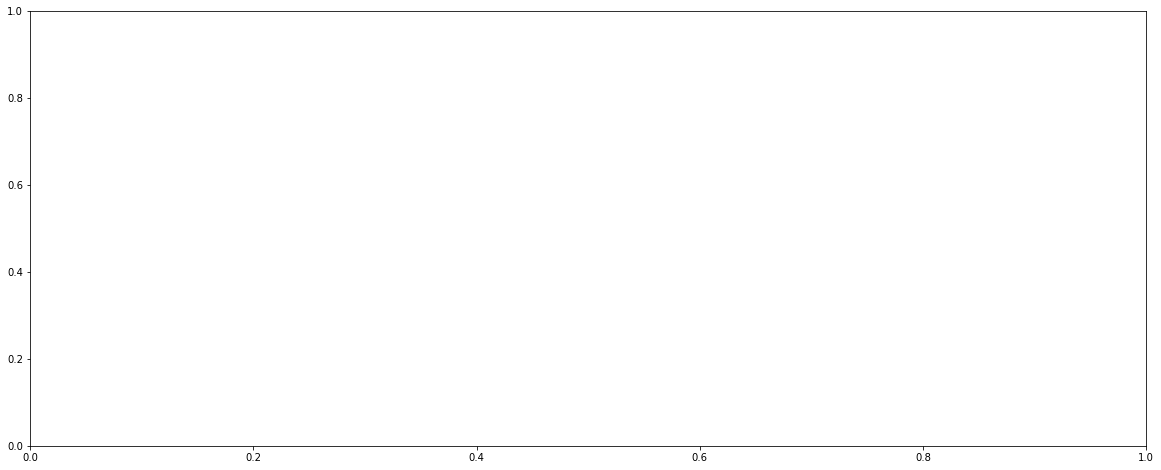

In [93]:
#Step 4: Create Calendar Heat Map 
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot()
cax = calmap.yearplot(data=Cal_Den,year=2020, ax=ax, cmap='YlGn')
plt.suptitle('Calendar Heat Map Denver Crimes in 2020',y=.20, fontsize=35)
fig.colorbar(cax.get_children()[1], ax=cax, orientation='horizontal')